Heart-disease Project
  project on predicting whether a patiant have heart disease or not

we going to the following approach
   1. problem defination
   2. data
   3. Evaluation
   4. Features
   5. Modeling
   6. Experimentation

      

## Preparation of Tools

   importing pandas matplotlib and numpy
   #regular EDA(exploratory data analysis)

In [41]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#To show plot in jupyter
%matplotlib inline 

from sklearn.linear_model import LogisticRegression 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

# Model Evaluations
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.model_selection import RandomizedSearchCV,GridSearchCV
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.metrics import precision_score, recall_score,f1_score
from sklearn.metrics import RocCurveDisplay


Load Data

In [42]:
df=pd.read_csv("heart-disease.csv")
df.shape


(303, 14)

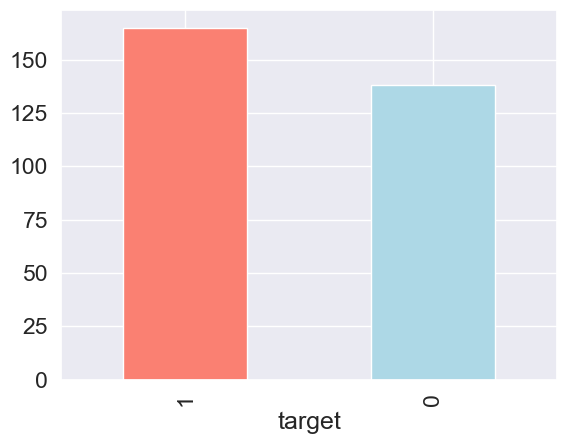

In [43]:
df['target'].value_counts().plot(kind='bar',color=['salmon','lightblue']);

In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [45]:
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [46]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


###Heart Disese Freq.. acording to sex


In [47]:
df.sex.value_counts()

sex
1    207
0     96
Name: count, dtype: int64

In [48]:
#compare target  column with sex colum
pd.crosstab(df.target,df.sex)

sex,0,1
target,,
0,24,114
1,72,93


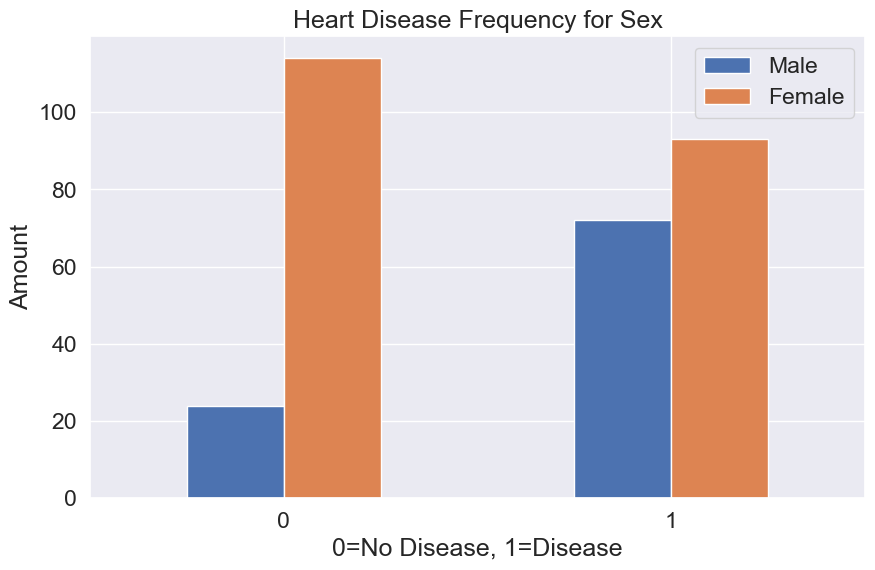

In [49]:
#create a plot of crosstab
pd.crosstab(df.target,df.sex,).plot(kind='bar',figsize=(10,6))
plt.title('Heart Disease Frequency for Sex')
plt.xlabel('0=No Disease, 1=Disease')
plt.ylabel('Amount')
plt.legend(['Male','Female']);
plt.xticks(rotation=0);

In [50]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


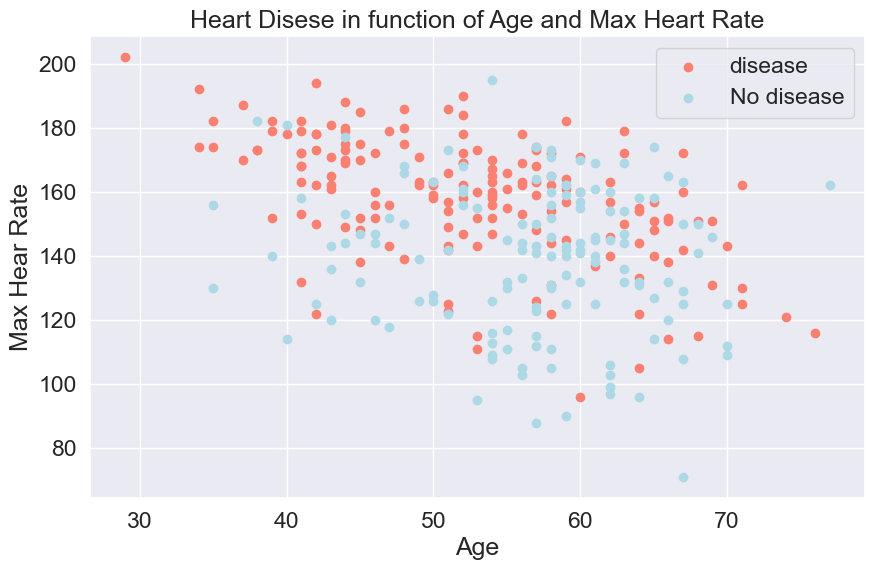

In [51]:
#Age vs MAx Heart Rate for heart disease
#create another fig
plt.figure(figsize=(10,6))
 
#Scatter with Positive example

plt.scatter(df.age[df.target==1],
            df.thalach[df.target==1],
           c='salmon')

# Scatter with negative example
plt.scatter(df.age[df.target==0],
            df.thalach[df.target==0],
           c='lightblue')
plt.title('Heart Disese in function of Age and Max Heart Rate')
plt.xlabel('Age')
plt.ylabel('Max Hear Rate')
plt.legend(['disease','No disease'])


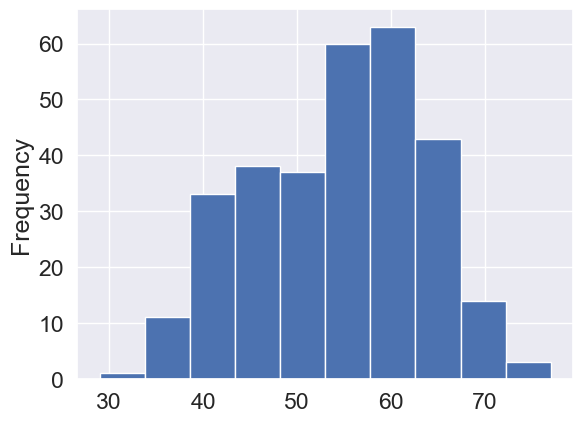

In [52]:
df.age.plot.hist();

In [53]:
pd.crosstab(df.cp,df.target)

target,0,1
cp,,
0,104,39
1,9,41
2,18,69
3,7,16


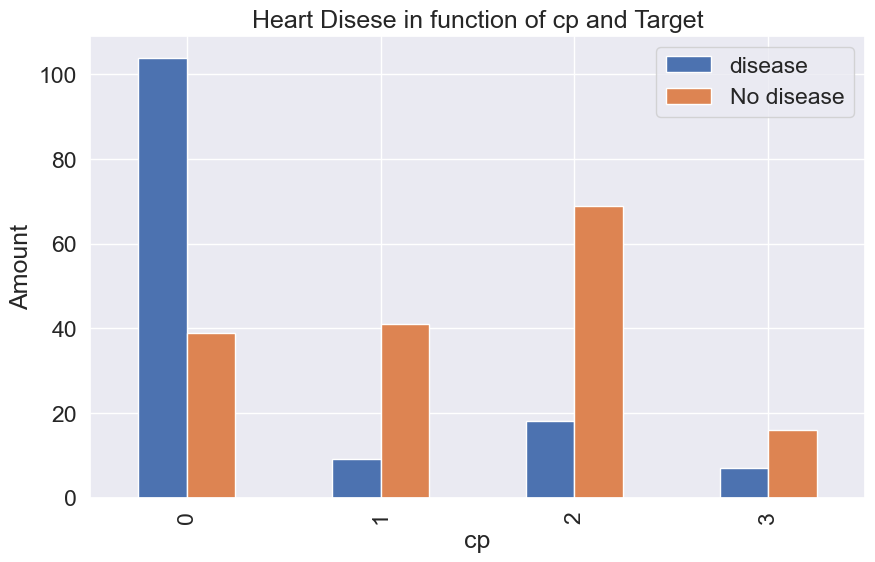

In [54]:
pd.crosstab(df.cp,df.target).plot(kind='bar',figsize=(10,6))
plt.title('Heart Disese in function of cp and Target')
plt.xlabel('cp')
plt.ylabel('Amount')
plt.legend(['disease','No disease']);

In [55]:
# Make a correlation matrix
df.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


(14.5, -0.5)

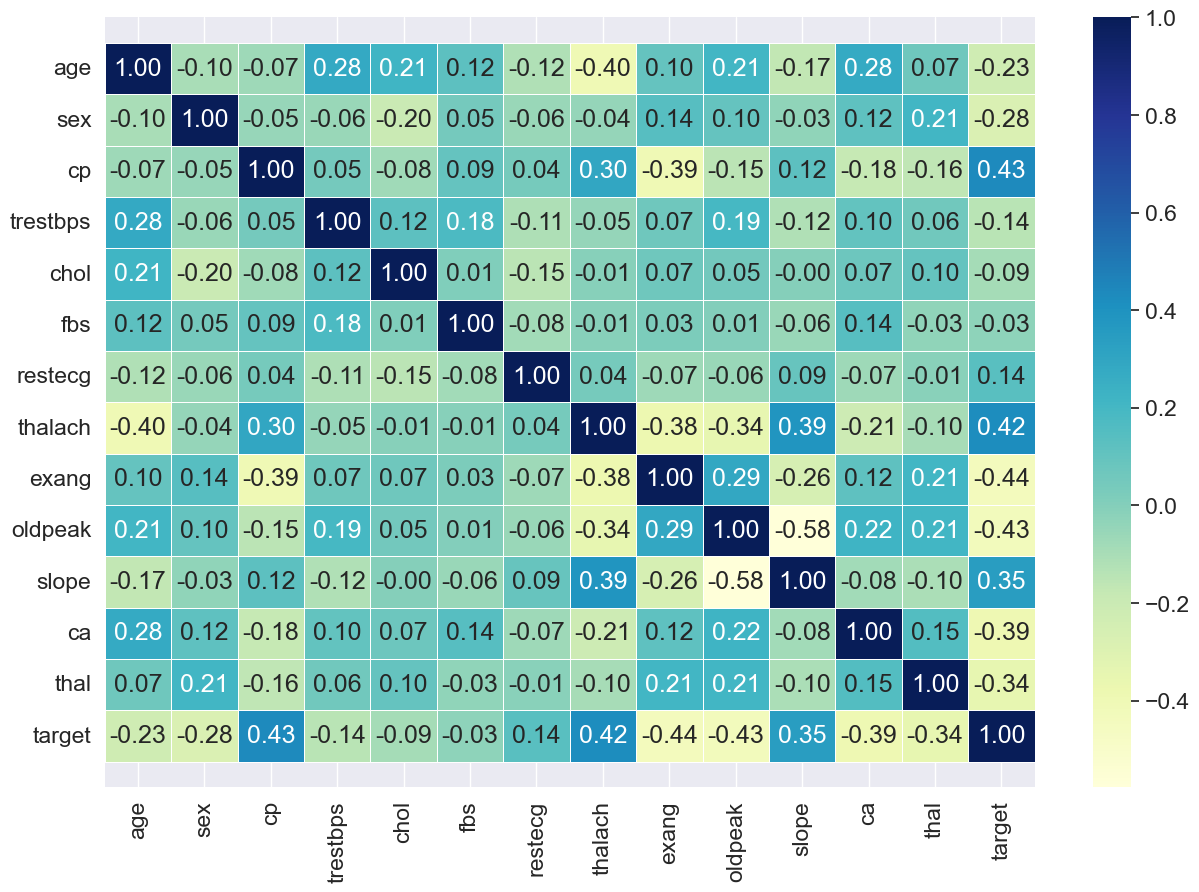

In [56]:
#lets make our correlation matrix a little prettier
corr_matrix=df.corr()
fig,ax=plt.subplots(figsize=(15,10))
ax= sns.heatmap(corr_matrix,
               annot=True,
                linewidths=0.5,
                fmt='.2f',
                cmap="YlGnBu");
bottom,top=ax.get_ylim()
ax.set_ylim(bottom+0.5,top-0.5)


# 5.Modeling

In [57]:
#let split the data into x and y
x=df.drop('target',axis=1)
y=df['target']

np.random.seed(42)
#let split the data into train and test data
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

#definition of model instant
from scipy.stats import uniform
clf=KNeighborsClassifier(n_neighbors=15)
Rand_cv=cross_val_score(clf,x,y,cv=16)
np.array(Rand_cv)


array([0.63157895, 0.63157895, 0.47368421, 0.57894737, 0.68421053,
       0.57894737, 0.84210526, 0.94736842, 0.57894737, 0.68421053,
       0.68421053, 0.68421053, 0.78947368, 0.63157895, 0.52631579,
       0.77777778])

# we are going to try 3 different model to test ..
1.randomForestclassifier

2.KneighborsClassifier

3.LogisticRegression



In [58]:
#put models in dictionary
models={ "Logistic Regression":LogisticRegression(),
    "KNN":KNeighborsClassifier(n_neighbors=15),
        "Random Forest":RandomForestClassifier(n_estimators=100)   
}

#create a function to fit and score models
def fit_and_score(models,x_train,x_test,y_train,y_test):
    """ 
       fit and evaluates given machin learning models.
       models: adict of different sklearn mLmodels
       x_train: training data (no label)
       x_test: ttesting data (no no labels)
       y_train:training labels
       y_test:test labels
    """
    # set randon seed
    np.random.seed(42)
    #make a dict to keep model scores
    model_scores={}
    #Loop through models
    for name,model in models.items():
        #fit the train data
        model.fit(x_train,y_train)
        #Evaluating the model score
        model_scores[name]=model.score(x_test,y_test) 
    return model_scores


#let split the data into x and y
x=df.drop('target',axis=1)
y=df['target']

np.random.seed(42)
#let split the data into train and test data
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

model_score=fit_and_score(models,x_train,x_test,y_train,y_test)
model_score

    

{'Logistic Regression': 0.8852459016393442,
 'KNN': 0.6885245901639344,
 'Random Forest': 0.8360655737704918}

<Axes: >

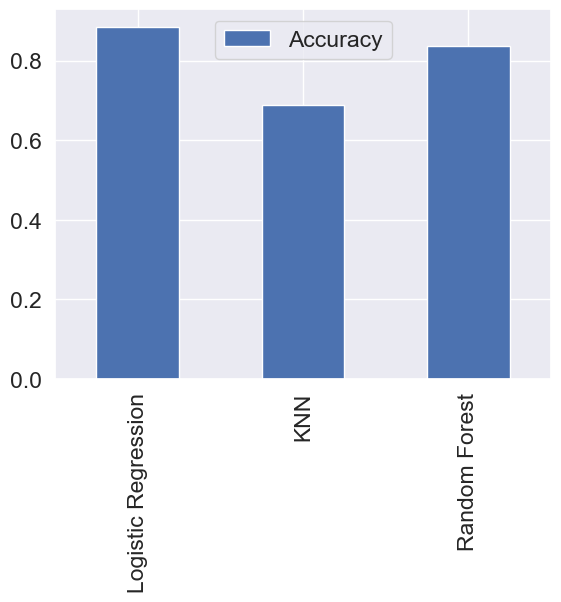

In [59]:
model_comp=pd.DataFrame(model_score,index=['Accuracy'])
model_comp.T.plot.bar()

Let's look at the following:-
  1.Hyperparameters tuning
  
  2.Feature importance
  
  3.Confusion matrix
  
  4.Cross-validation
  
  5.precision
  
  6.Recall
  
  7.F1 score
  
  8.Classification report
  
  9.ROC curve
  
  10.Area under the curve(AUC)

1.Hyperparameters tuning

In [60]:
#let split the data into x and y
x=df.drop('target',axis=1)
y=df['target']

np.random.seed(42)
#let split the data into train and test data
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

#definition of model instant
from scipy.stats import uniform

rf_grid =  {'bootstrap': [True, False],
               'max_depth': [3,10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None],
               'max_features': ['auto', 'sqrt'],
               'min_samples_leaf': [1, 2, 4],
               'min_samples_split': [2, 5, 10],
               'n_estimators': np.arange(100,1000,10)}


clf=RandomForestClassifier()
rs_cv=RandomizedSearchCV(clf,rf_grid,n_iter=20,cv=5,verbose=True)
rs_cv.fit(x_train,y_train)

rs_cv.score(x_test,y_test)
#rs_cv.best_params_

Fitting 5 folds for each of 20 candidates, totalling 100 fits


0.8688524590163934

In [61]:
rs_cv.best_params_

{'n_estimators': 930,
 'min_samples_split': 5,
 'min_samples_leaf': 2,
 'max_features': 'sqrt',
 'max_depth': 100,
 'bootstrap': True}

In [62]:
#let split the data into x and y
x=df.drop('target',axis=1)
y=df['target']

np.random.seed(42)
#let split the data into train and test data
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

#definition of model instant
from scipy.stats import uniform

KNN_grid = {
    'n_neighbors': np.arange(2,100,2),
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']}


clf=KNeighborsClassifier()
gs_cv=RandomizedSearchCV(clf,KNN_grid,n_iter=25,cv=20)
gs_cv.fit(x_train,y_train)

gs_cv.score(x_test,y_test)

#gs_cv.best_params_

0.7540983606557377

In [63]:
gs_cv.best_params_

{'weights': 'distance', 'n_neighbors': 46, 'metric': 'manhattan'}

In [64]:
#let split the data into x and y
x=df.drop('target',axis=1)
y=df['target']

np.random.seed(42)
#let split the data into train and test data
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

#definition of model instant
from scipy.stats import uniform

Log_Reg_grid = {
    'C' : np.logspace(-4, 4, 30),
    'solver':['lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga']
    }


clf=LogisticRegression()
grid_s_cv=GridSearchCV(clf,
                       Log_Reg_grid,
                       cv=18,
                       verbose=True)
grid_s_cv.fit(x_train,y_train)

grid_s_cv.score(x_test,y_test)

#grid_s_cv.best_params_

Fitting 18 folds for each of 180 candidates, totalling 3240 fits


0.8852459016393442

In [65]:
grid_s_cv.best_params_

{'C': 0.20433597178569418, 'solver': 'lbfgs'}

In [66]:
model_score

{'Logistic Regression': 0.8852459016393442,
 'KNN': 0.6885245901639344,
 'Random Forest': 0.8360655737704918}

###Evaluate our tuned machine learning classifier, beyond accuracy

* ROC curve and AUC score
* Confusion metrix
* Classification report
* precision
* Recall
* F1-score
...and it would be great if cross-validation was used where possible

  Tomake comparison and evaluate out trained model,first we need to make predictions

In [67]:
y_preds=grid_s_cv.predict(x_test)
y_preds

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0], dtype=int64)

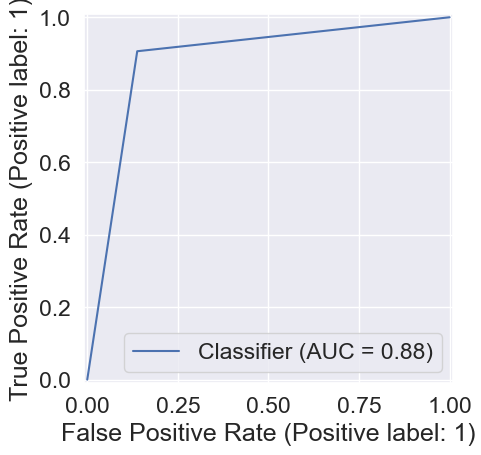

In [68]:
# plot the ROC curve  and calculate AUC metric
RocCurveDisplay.from_predictions(y_test,y_preds);

In [69]:
#Confusion metrics
print(confusion_matrix(y_test,y_preds))

[[25  4]
 [ 3 29]]


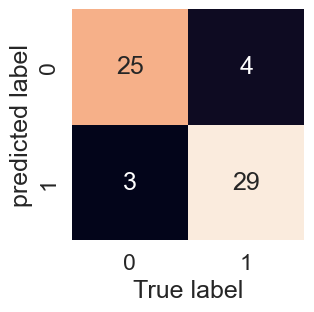

In [70]:
sns.set(font_scale=1.5)

def plot_conf_mat(y_test,y_preds):
    fig,ax=plt.subplots(figsize=(3,3))
    #sns.heatmap() is used to draw the confusion metrix
    ax=sns.heatmap(confusion_matrix(y_test,y_preds),
                  annot=True,
                  cbar=False)
    ax.set(xlabel='True label',
           ylabel='predicted label')

plot_conf_mat(y_test,y_preds)

In [71]:
#Classification report
print(classification_report(y_test,y_preds))

              precision    recall  f1-score   support

           0       0.89      0.86      0.88        29
           1       0.88      0.91      0.89        32

    accuracy                           0.89        61
   macro avg       0.89      0.88      0.88        61
weighted avg       0.89      0.89      0.89        61



In [81]:

#discussion of classification report with cross_validation-score

clf=LogisticRegression(C= 0.20433597178569418, solver= 'lbfgs')
acc_scores=cross_val_score(clf,x,y,scoring='accuracy',cv=5)
np.mean(acc_scores)

0.8446994535519124

In [82]:
#Mean precision value...
pre_scores=cross_val_score(clf,x,y,scoring='precision',cv=5)
np.mean(pre_scores)

0.8207936507936507

In [83]:
#Mean recall value
recall_scores=cross_val_score(clf,x,y,scoring='recall',cv=5)
np.mean(recall_scores)

0.9212121212121213

In [89]:
#Mean f1-scorevalue
f1_scores=cross_val_score(clf,x,y,scoring='f1',cv=5)
np.mean(f1_scores)

0.8673007976269721

In [87]:
scores_by_cvs={
    'accuracy_scores':np.mean(acc_scores),
    'precision_score':np.mean(pre_scores),
    'recall_score':np.mean(recall_scores),
    'f1_scores':f1_scores
}
scores_by_cvs

{'accuracy_scores': 0.8446994535519124,
 'precision_score': 0.8207936507936507,
 'recall_score': 0.9212121212121213,
 'f1_scores': 0.8673007976269721}

In [111]:
temp=print(classification_report(y_test,y_preds))
temp

              precision    recall  f1-score   support

           0       0.89      0.86      0.88        29
           1       0.88      0.91      0.89        32

    accuracy                           0.89        61
   macro avg       0.89      0.88      0.88        61
weighted avg       0.89      0.89      0.89        61



<Axes: >

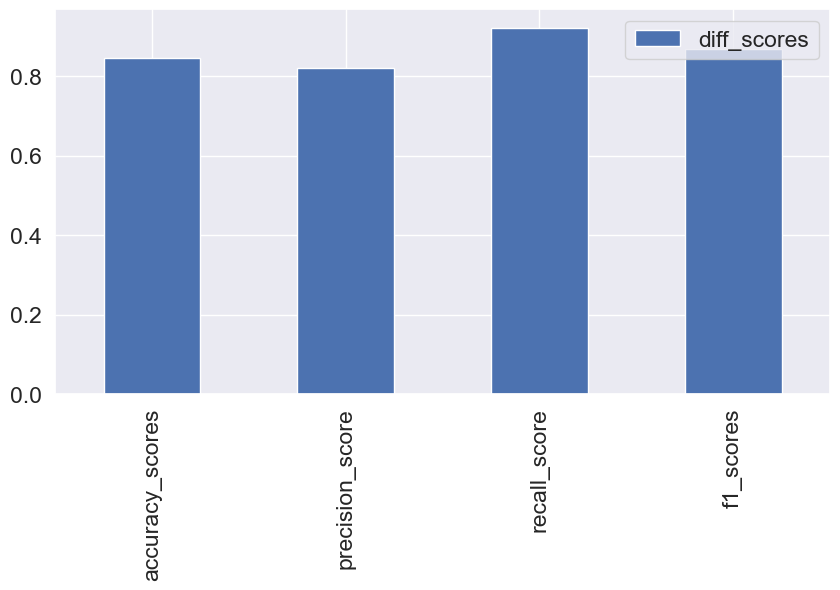

In [117]:
temp_df=pd.DataFrame(scores_by_cvs,index=['diff_scores']).T.plot(kind='bar' ,figsize=(10,5))
temp_df

###Features Importance

Feature importance is another as asking 'which feature contributed most to the outcomes of the model and gow did they contributes'

In [137]:

clf=LogisticRegression(C= 0.20433597178569418, solver= 'lbfgs')
clf.fit(x_train,y_train);
##using Coef_ method
clf.coef_

array([[ 0.0042189 , -0.81965538,  0.64436232, -0.01135363, -0.0014964 ,
         0.00865608,  0.31792664,  0.02519933, -0.58160909, -0.58643189,
         0.4316188 , -0.6326669 , -0.74077851]])

In [138]:
feature_matrics=dict(zip(df.columns,list(clf.coef_[0])))
feature_matrics

{'age': 0.004218902161660029,
 'sex': -0.8196553783838519,
 'cp': 0.6443623239953605,
 'trestbps': -0.01135362639682397,
 'chol': -0.0014963994230039479,
 'fbs': 0.008656084774359873,
 'restecg': 0.31792663742727373,
 'thalach': 0.025199327665540658,
 'exang': -0.5816090876401085,
 'oldpeak': -0.5864318907234268,
 'slope': 0.43161879829262956,
 'ca': -0.6326669009712381,
 'thal': -0.7407785110879198}

<Axes: >

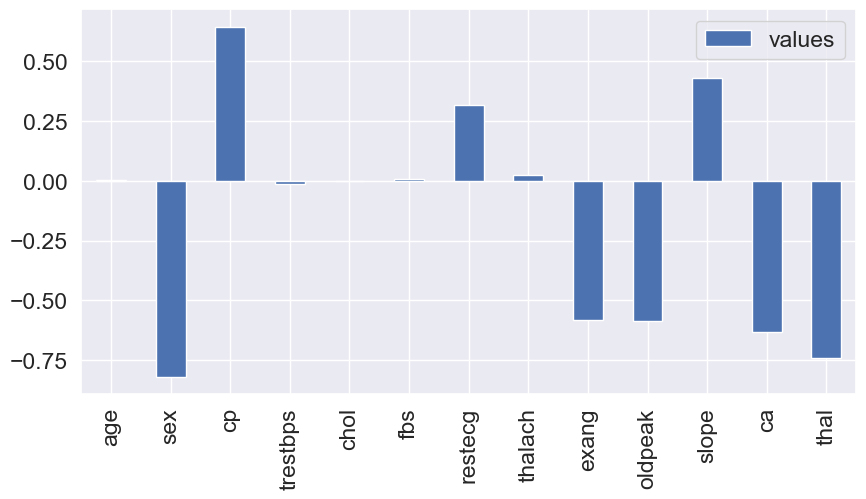

In [133]:
#Ploting of Features importance coefficients
pd.DataFrame(feature_matrics,index=['values']).T.plot(kind='bar',figsize=(10,5))

In [141]:
pd.crosstab(df.slope,df.target)

target,0,1
slope,,
0,12,9
1,91,49
2,35,107
